In [1]:
import math
import pandas as pd
import random
import numpy as np
import random
import matplotlib.pyplot as plt
from typing import List, Dict, Tuple

In [2]:
data = pd.read_csv('./data/FinalData.csv')
data.head(5)

,ID,Name,Address,Latitude,Longitude,Opening Hours,Types,Rating,User Ratings Total
0,ChIJ-3wY7lEYQjERrJ9wTeoa-WQ,Blue Summer Hotel,"35 Tôn Thất Đạm, Xuân Hà, Thanh Khê, Đà Nẵng 5...",16.072062,108.201392,"['Monday: Open 24 hours', 'Tuesday: Open 24 ho...","['lodging', 'point_of_interest', 'establishment']",3.9,42.0
1,ChIJ-UBpozMYQjERDV3V1nrXEiM,Vinapha 2 Hotel,"19 Phạm Hồng Thái, Hải Châu 1, Hải Châu, Đà Nẵ...",16.067351,108.221777,['Monday: 12:00\u202fAM\u2009–\u200911:59\u202...,"['lodging', 'point_of_interest', 'establishment']",3.0,93.0
2,ChIJ13MshlIYQjERM4sqFu8lvyA,Ribo Coffee,"05 Thái Thị Bôi, Chính Gián, Thanh Khê, Đà Nẵn...",16.068272,108.201195,['Monday: 6:30\u202fAM\u2009–\u200910:30\u202f...,"['cafe', 'food', 'point_of_interest', 'establi...",4.1,306.0
3,ChIJ14kOf8kZQjERrdrrQPpiZKA,Mì Quảng Thi,"251 Hoàng Diệu, Nam Dương, Hải Châu, Đà Nẵng 5...",16.058546,108.217224,['Monday: 6:00\u202fAM\u2009–\u20091:29\u202fP...,"['restaurant', 'point_of_interest', 'food', 'e...",4.3,308.0
4,ChIJ2aT3UqMXQjER_rVaqCoyyWU,Chùa Linh Ứng,"Vườn Lâm Tỳ Ni, Hoàng Sa, Thọ Quang, Sơn Trà, ...",16.100261,108.277747,"['Monday: Open 24 hours', 'Tuesday: Open 24 ho...","['place_of_worship', 'point_of_interest', 'est...",4.7,1785.0


In [3]:
dataHours = pd.read_csv('./data/opening_hours.csv')
dataHours.head(5)

,ID,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
0,ChIJ-3wY7lEYQjERrJ9wTeoa-WQ,00:00 AM 11:59 PM,00:00 AM 11:59 PM,00:00 AM 11:59 PM,00:00 AM 11:59 PM,00:00 AM 11:59 PM,00:00 AM 11:59 PM,00:00 AM 11:59 PM
1,ChIJ-UBpozMYQjERDV3V1nrXEiM,12:00 AM 11:59 PM,12:00 AM 11:59 PM,12:00 AM 11:59 PM,12:00 AM 11:59 PM,12:00 AM 11:59 PM,12:00 AM 11:59 PM,12:00 AM 11:59 PM
2,ChIJ13MshlIYQjERM4sqFu8lvyA,6:30 AM 10:30 PM,6:30 AM 10:30 PM,6:30 AM 10:30 PM,6:30 AM 10:30 PM,6:30 AM 10:30 PM,6:30 AM 10:30 PM,6:30 AM 10:30 PM
3,ChIJ14kOf8kZQjERrdrrQPpiZKA,"6:00 AM 1:29 PM, 4:00 9:00 PM","6:00 AM 1:29 PM, 4:00 9:00 PM","6:00 AM 1:29 PM, 4:00 9:00 PM","6:00 AM 1:29 PM, 4:00 9:00 PM","6:00 AM 1:29 PM, 4:00 9:00 PM","6:00 AM 1:29 PM, 4:00 9:00 PM","6:00 AM 1:29 PM, 4:00 9:00 PM"
4,ChIJ2aT3UqMXQjER_rVaqCoyyWU,00:00 AM 11:59 PM,00:00 AM 11:59 PM,00:00 AM 11:59 PM,00:00 AM 11:59 PM,00:00 AM 11:59 PM,00:00 AM 11:59 PM,00:00 AM 11:59 PM


In [4]:
newData = data.loc[:, ["ID", "Name", "Latitude", "Longitude"]]
newData.head(5)

,ID,Name,Latitude,Longitude
0,ChIJ-3wY7lEYQjERrJ9wTeoa-WQ,Blue Summer Hotel,16.072062,108.201392
1,ChIJ-UBpozMYQjERDV3V1nrXEiM,Vinapha 2 Hotel,16.067351,108.221777
2,ChIJ13MshlIYQjERM4sqFu8lvyA,Ribo Coffee,16.068272,108.201195
3,ChIJ14kOf8kZQjERrdrrQPpiZKA,Mì Quảng Thi,16.058546,108.217224
4,ChIJ2aT3UqMXQjER_rVaqCoyyWU,Chùa Linh Ứng,16.100261,108.277747


In [5]:
#Cloudy Phan Dang Luu
latInit = 16.019110655988168
lngInit = 108.22903420822459

In [6]:
def haversineDistance(lat1, lng1, lat2, lng2):
    latRadian1 = math.radians(lat1)
    lngRadian1 = math.radians(lng1)
    latRadian2 = math.radians(lat2)
    lngRadian2 = math.radians(lng2)

    dlat = latRadian2 - latRadian1
    dlng = lngRadian2 - lngRadian1
    R = 6371e3

    a = math.sin(dlat/2) ** 2 + math.cos(latRadian1) * math.cos(latRadian2) * math.sin(dlng/2) ** 2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
    
    return R * c

In [7]:
def calFitness(routeDistance: float):
    return 1/(routeDistance + 1)

In [8]:
class TimeActive:
    def __init__(self, open: int, close: int) -> None:
        self.open = open
        self.close = close

In [9]:
class Location:
    def __init__(self, x: float, y: float, timeOpens: List[TimeActive] = None, name: str = None, time: TimeActive = None) -> None:
        self.name = name
        self.x = x
        self.y =y
        self.timOpens = timeOpens
        self.time = time

    def to_tupl(self) -> Tuple:
        return (self.x, self.y)
    
    def set_Time(self, time: TimeActive):
        self.time = time

In [10]:
class Route:
    def __init__(self, route: List['Location']) -> None:
        self.route = route
        self.distance: float = 0.0
        self.fitness: float = 0.0
    
    def routeDistance(self) -> float:
        if self.distance == 0: 
            pathDistance = 0.0  
            for index in range(0, len(self.route) - 1):
                dist = haversineDistance(self.route[index].x, self.route[index].y, self.route[index + 1].x, self.route[index + 1].y)
                pathDistance+= dist
            self.distance = pathDistance
        return self.distance
    
    def routeFitness(self) -> float:
        if self.fitness == 0:
            self.fitness = calFitness(self.routeDistance())
        return self.fitness
    
    def coordinates(self) -> Tuple[List[float], List[float]]:
        x_list, y_list = [], []
        for location in self.route:
            x_list.append(location.to_tupl()[0])
            y_list.append(location.to_tupl()[1])
        return x_list, y_list
    
    def getDetail(self):
        locations = []
        for location in self.route:
            locations.append((location.name, location.x, location.y))

        return locations

In [11]:
def compareTime(currentTime, stayTime, timeOpens: List[TimeActive]):
    for i in range(len(timeOpens)):
        #lon hon thoi gian mo cua, thoi gian roi di be hon thoi gian dong cua
        if timeOpens[i].open <= currentTime and timeOpens[i].close >= currentTime + stayTime:
            return True
    return False

In [12]:
import datetime
def handle_duration_and_weekdays(start_time, end_time):
    # Chuyển đổi chuỗi thời gian thành đối tượng datetime
    start_dt = datetime.datetime.strptime(start_time, '%I:%M %p %d/%m/%Y')
    end_dt = datetime.datetime.strptime(end_time, '%I:%M %p %d/%m/%Y')

    # Tính khoảng thời gian và số ngày của nó
    duration_time = int((end_dt - start_dt).total_seconds() // 60)
    num_days = int((end_dt - start_dt).days)

    # Tạo một mảng các thứ trong khoảng thời gian
    current_dt = start_dt
    weekdays = []
    while current_dt <= end_dt:
        weekdays.append(current_dt.strftime('%A'))
        current_dt += datetime.timedelta(days=1)

    return duration_time, num_days, weekdays

print(handle_duration_and_weekdays("7:00 AM 19/4/2023", "10:00 AM 19/4/2023"))

(180, 0, ['Wednesday'])


In [13]:
def handleTimes(time, text):
    time = time.split(':')

    hour = int(time[0])
    minute = int(time[1])

    value = hour * 60 + minute if text == 'AM' else (hour+ 12) * 60 + minute
    return value

In [14]:
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekdays_opening_hours = {}
for day in range(len(days)):
    timeOpens = []
    for i in range(0, len(dataHours)):
        openingHours = dataHours.iloc[i][days[day]]
        openingHours = openingHours.strip("']['").split(',')
        opens = []
        closes = []
        for item in openingHours:
            times = item.strip(' ').split(' ')
            timeOpen = handleTimes(times[0], times[1])
            timeClose = handleTimes(times[-2], times[-1])
            opens.append(timeOpen)
            closes.append(timeClose)
        timeOpens.append([TimeActive(opens[i], closes[i]) for i in range(len(opens))])
    weekdays_opening_hours[days[day]] = timeOpens
print(weekdays_opening_hours)

{'Monday': [[<__main__.TimeActive object at 0x7efc0221f0d0>], [<__main__.TimeActive object at 0x7efc0221e650>], [<__main__.TimeActive object at 0x7efbd89e3be0>], [<__main__.TimeActive object at 0x7efc0221edd0>, <__main__.TimeActive object at 0x7efbd8a90ee0>], [<__main__.TimeActive object at 0x7efbd89e3e80>], [<__main__.TimeActive object at 0x7efbd8a90880>], [<__main__.TimeActive object at 0x7efbd8a92f80>], [<__main__.TimeActive object at 0x7efbd8a91000>], [<__main__.TimeActive object at 0x7efbd8a92ef0>], [<__main__.TimeActive object at 0x7efbd8a90d60>], [<__main__.TimeActive object at 0x7efbd8a909d0>], [<__main__.TimeActive object at 0x7efbd8a92aa0>], [<__main__.TimeActive object at 0x7efbd8a93430>], [<__main__.TimeActive object at 0x7efbd8a91f00>], [<__main__.TimeActive object at 0x7efbd8a90670>], [<__main__.TimeActive object at 0x7efbd8a90100>], [<__main__.TimeActive object at 0x7efbd8a921a0>], [<__main__.TimeActive object at 0x7efbd8a92350>], [<__main__.TimeActive object at 0x7efbd8

In [15]:
def getPointByDay(data, startPoint, startTime, stayTime, day, allPoints, n):
    timeOpens = weekdays_opening_hours[day]
    currentPoint = startPoint
    timeCome = startTime
    listDetailPoints = [Location(currentPoint[0], currentPoint[1], timeOpens='Start point', name='Start point', time=TimeActive(timeCome, timeCome))]
    listPoints = [currentPoint]
    while(len(listDetailPoints) < n):
        minDistance = float('inf')
        nextPoint = None
        point = None
        timeCome = timeCome + 30
        name = None

        for i, row in data.iterrows():
            lat = row['Latitude']
            lng = row['Longitude']
            timeOpen = timeOpens[i]
            
            if (lat, lng) not in listPoints and (lat, lng) not in allPoints:
                if compareTime(timeCome, stayTime, timeOpen) == False:
                    continue

                dist = haversineDistance(currentPoint[0], currentPoint[1], lat, lng)

                if dist < minDistance:
                    minDistance = dist
                    nextPoint = (lat, lng)
                    point = i
                    name = row['Name']
    
        if nextPoint is not None:
            currentPoint = nextPoint
            listPoints.append(currentPoint)
            listDetailPoints.append(Location(currentPoint[0], currentPoint[1], timeOpens[point], name, time=TimeActive(timeCome, timeCome + stayTime)))
            timeCome = timeCome + stayTime
    listDetailPoints.append(Location(startPoint[0], startPoint[1], timeOpens='End point', name='End point', time=TimeActive(timeCome, timeCome)))
    return listPoints, listDetailPoints

In [16]:
def nearestNeighborAlgorithm(data, n):
    duration_time, num_days, weekdays = handle_duration_and_weekdays("7:00 AM 19/4/2023", "7:00 AM 22/4/2023")
    startPoint = (latInit, lngInit)
    allPoints = []
    routesInfo = []

    for day in range(num_days):
        startTime = handleTimes("07:00", "AM") 
        ####### find in day
        listPoints, listDetailPoints = getPointByDay(data, startPoint, startTime, 90, weekdays[day], allPoints, n)
        allPoints += listPoints
        routesInfo.append(listDetailPoints)

    return routesInfo

In [17]:
def nearestNeighborAlgorithm1(data, n = 14):
    startPoint = (latInit, lngInit)
    listPoints = []
    listDetailsPoint = []

    currentPoint = startPoint
    listPoints.append(currentPoint)
    detailsPoint = [ 0, 'Cloudy', currentPoint]
    listDetailsPoint.append(detailsPoint)

    while(len(listPoints) < n):
        minDistance = float('inf')
        nextPoint = None
        name = None
        index = 0

        for i , row in data.iterrows():
            
            lat = row['Latitude']
            lng = row['Longitude']
            if(lat, lng) not in listPoints:
                dist = haversineDistance(currentPoint[0], currentPoint[1], lat, lng)
                
                if dist < minDistance:
                    minDistance = dist
                    nextPoint = (lat, lng)
                    name = row['Name']
                    index = i + 1
            
        if nextPoint is not None:
            currentPoint = nextPoint
            listPoints.append(currentPoint)
            detailsNewPoint = [index, name, currentPoint]
            listDetailsPoint.append(detailsNewPoint)

    endPoint = startPoint
    listPoints.append(endPoint)
    listDetailsPoint.append(detailsPoint)

    return listPoints, listDetailsPoint

In [18]:
def initPopulation1(populationSize: int, listInitLocations: List = None) -> List[List['Location']]:
    population = []

    listSamples = list(range(1, len(listInitLocations) - 1))

    for _ in range(populationSize):
        if listInitLocations is not None:
            listRandoms = random.sample(listSamples, len(listSamples))
            newLocation = [listInitLocations[0]] + [listInitLocations[i] for i in listRandoms] + [listInitLocations[-1]]

            population.append(newLocation)

    return population

In [19]:
def updateArrivalTime(locations):
    startTime = handleTimes("07:00", "AM")
    timeCome = startTime 
    stayTime = 90
    for i in range(1, len(locations)):
        timeCome += 30
        locations[i]['time'] = (timeCome, timeCome + stayTime)
    return locations

In [20]:
def checkArrivalTime(locations: List[Location]):
    startTime = handleTimes("07:00", "AM")
    timeCome = startTime 
    stayTime = 90

    for i in range(1, len(locations) - 1):
        timeCome += 30
        isTrue = compareTime(timeCome, stayTime, locations[i].timOpens)
        if(isTrue == False): return False
        timeCome = timeCome + stayTime
    
    return True

In [21]:
def initPopulation(populationSize: int, listInitLocations: List = None) -> List[List['Location']]:
    population = []

    listSamples = list(range(1, len(listInitLocations) - 1))

    while(len(population) < populationSize):
        if listInitLocations is not None:
            listRandoms = random.sample(listSamples, len(listSamples))
            newLocation = [listInitLocations[0]] + [listInitLocations[i] for i in listRandoms] + [listInitLocations[-1]]

            # isTrue = checkArrivalTime(newLocation)

            # if isTrue: 
            #     
            population.append(newLocation)

    return population

In [22]:
def rankRoutes(population: List[List['Location']]) -> List[Tuple[int, float]]:
    fitnessResults: Dict = {}

    for i in range(len(population)):
        fitnessResults[i] = Route(population[i]).routeFitness()

    return sorted(fitnessResults.items(), key=lambda x: x[1], reverse=True)

In [23]:
def touramentSelection(populationRanked: List[Tuple[int, float]], numElites: int = 0):
    df = pd.DataFrame(np.array(populationRanked), columns=["Index", "Fitness"])
    df["weights"] = 100 * df.Fitness / df.Fitness.sum()
    selection_results = df.sample(n=len(populationRanked)-numElites,
                                  replace=True,
                                  weights=df.weights
                                  ).values[:, 0]
    elite_results = df.iloc[0:numElites, 0].values
    selection_results = list(map(int, np.concatenate(
        (selection_results, elite_results)).tolist()))
    return selection_results

In [24]:
def mergedPoint(population: List[List['Location']], selection_results: List[int]) -> List[List['Location']]:
    output: List = []
    for i in range(len(selection_results)):
        index = selection_results[i]
        output.append(population[index])
    return output

In [25]:
def crossoverMix(parent1: List['Location'], parent2: List['Location']):
    child1: List[Location]
    child2: List[Location]

    # while(True):
    point1, point2 = random.sample(range(1, len(parent1)-1), 2)
    begin = min(point1, point2)
    end = max(point1, point2)

    child1_begin = parent1[:begin]
    child1_end = parent1[end:]

    child1 = child1_begin + child1_end
    child2 = parent2[begin:end+1]

    child1_remain = [item for item in parent2[1:-1] if item not in child1]
    child2_remain = [item for item in parent1[1:-1] if item not in child2]

    child1 = child1_begin + child1_remain + child1_end
    child2 += child2_remain

    child2.insert(0, parent2[0])
    child2.append(parent2[0])

    # isTrue = checkArrivalTime(child1) and checkArrivalTime(child2)

    # if(isTrue): break

    return child1, child2

In [26]:
def crossoverPopulation(mergedPoint: List[List['Location']], numElites: int = 0):
    children: List = []
    numNonElite = len(mergedPoint) - numElites

    individuals = random.sample(mergedPoint, len(mergedPoint))

    for i in range(1, numElites + 1):
        isTrue = checkArrivalTime(mergedPoint[-i])
        if isTrue: 
            children.append(mergedPoint[-i])

    index = 0
    while(len(children) < numNonElite + numElites):
        child1, child2 = crossoverMix(individuals[index], individuals[len(mergedPoint) -index -1])
        # isTrue = checkArrivalTime(child1)
        # if isTrue: 
        #     
        children.append(child1)
        index += 1

    return children

In [27]:
def mutation(individual: List['Location'], mutationRate):
    if random.random() < mutationRate:
        # while(True):
        mutation_index_1, mutation_index_2 = random.sample(range(1, len(individual) - 1), 2)
        begin = min(mutation_index_1, mutation_index_2)
        end = max(mutation_index_1, mutation_index_2)

        individual_begin = individual[:begin]
        individual_end = individual[end+1:]

        individual_center = individual[begin:end+1]
        individual_center.reverse()
        
        individual = individual_begin + individual_center + individual_end

        # isTrue = checkArrivalTime(individual)

        # if isTrue: break

    return individual

In [28]:
def mutatePopulation(children: List[List['Location']], mutationRate: float = 0):
    mutatedPopulation: List = []

    for individual in range(0, len(children)):
        mutatedIndividual = mutation(children[individual], mutationRate)
        mutatedPopulation.append(mutatedIndividual)
    return mutatedPopulation

In [29]:
def nextGeneration(currentGen: List[List['Location']], numElites: int, mutationRate: float = 0):
    populationRanked = rankRoutes(currentGen)
    
    bestCurrentGenRoute = Route(currentGen[populationRanked[0][0]])
    bestCurrentGenFitness = bestCurrentGenRoute.routeFitness()
    bestCurrentGenDistance = bestCurrentGenRoute.routeDistance()

    selectionResults = touramentSelection(populationRanked, numElites)
    individuals = mergedPoint(currentGen, selectionResults)
    children = crossoverPopulation(individuals, numElites)
    nextGeneration = mutatePopulation(children)

    return nextGeneration, bestCurrentGenRoute, bestCurrentGenFitness, bestCurrentGenDistance

In [30]:
def geneticAlgorithm(populationSize: int = 1, numElites: int = 0, numGens: int = 0, mutationRate: float = 0.001, listInitLocations: List = None):
    population = initPopulation(populationSize, listInitLocations)
    bestInitialRoute = Route(population[rankRoutes(population)[0][0]])
    # print("Initial Distance: " + str(bestInitialRoute.routeDistance()))

    bestRouteByGen: List = []
    bestFitnessByGen: List = []
    bestDistanceByGen: List = []

    for _ in range(0, numGens):
        population, bestCurrentGenRoute, bestCurrentGenFitness, bestCurrentGenDistance = \
            nextGeneration(population, numElites, mutationRate)
        
        bestRouteByGen.append(bestCurrentGenRoute)
        bestFitnessByGen.append(bestCurrentGenFitness)
        bestDistanceByGen.append(bestCurrentGenDistance)

    bestFinalRoute = Route(population[rankRoutes(population)[0][0]])
    # print("Final Distance: " + str(bestFinalRoute.routeDistance()))

    params = [populationSize,  numElites, numGens, mutationRate, listInitLocations]
    return bestFinalRoute, bestInitialRoute, bestFitnessByGen, bestDistanceByGen, params

In [31]:
def check():
    initLocations = nearestNeighborAlgorithm(newData)
    for i in initLocations:
        bfr, brbg, bfbg, bdbg, params = geneticAlgorithm(500, 250, 50, 0.005, i)
        print(bfr.getDetail())
        print(bfr.routeDistance())
        x, y = bfr.coordinates()
        plt.plot(x, y, **{'color': 'lightsteelblue', 'marker': 'o'})
        plt.show()
check()

TypeError: nearestNeighborAlgorithm() missing 1 required positional argument: 'n'

In [ ]:
listFitness = []
for i in listInitalLocations:
    bfr, brbg, bfbg, bdbg, params = geneticAlgorithm(3000, 500, 50, 0.005, i)
    listFitness.append(bfr.routeFitness())


In [ ]:
bestDistanceByMutation = []
i = 0.001
while(i <= 0.3):
    bfr, brbg, bfbg, bdbg, params = geneticAlgorithm(3000, 500, 50, i, listInitalLocations)
    bestDistanceByMutation.append(bfr.routeDistance())
    i += 0.001

In [23]:
{'mutationRate': 0.005,
 'numElites': 250,
 'numGens': 100,
 'populationSize': 500}

{'mutationRate': 0.005,
 'numElites': 250,
 'numGens': 100,
 'populationSize': 500}

In [33]:
def distancePlot(bestDistanceByGen: List[int], params: List):
    plt.plot(bestDistanceByGen)
    plt.ylabel('Distance')
    plt.xlabel('Generation')
    s = "popSize: " + str(params[0]) + "\nnumCities: " + str(params[1]) + \
        "\nnumGens: " + str(params[3]) + "\nmutationRate: " + str(params[4])
    # plt.text(s)
    # plt.text(0, bestDistanceByGen[0], round(bestDistanceByGen[0],1))
    plt.text(len(bestDistanceByGen),
             bestDistanceByGen[-1], round(bestDistanceByGen[-1],1))
    plt.show()

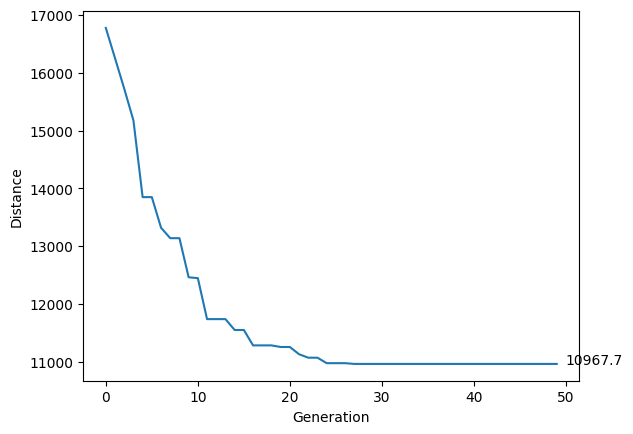

In [31]:
distancePlot(bdbg, params)

In [64]:
def fitnessePlot(bestDistanceByFitness: List[int], xAxis: List[int], params: List):
    plt.plot(xAxis, bestDistanceByFitness)
    plt.ylabel('Distance')
    plt.xlabel('Generation')
    s = "popSize: " + str(params[0]) + "\nnumCities: " + str(params[1]) + \
        "\nnumGens: " + str(params[3]) + "\nmutationRate: " + str(params[4])
    # plt.text(s)
    # plt.text(0, bestDistanceByFitness[0], round(bestDistanceByFitness[0],1))
    # plt.text(len(bestDistanceByFitness),
            #  bestDistanceByFitness[-1], round(bestDistanceByFitness[-1],1))
    plt.show()

In [50]:
listInitalPoints = []
for i in range(50):
    listRandoms = newData.sample(10)
    listPoints = []
    for i , row in listRandoms.iterrows():    
        lat = row['Latitude']
        lng = row['Longitude']
        listPoints.append((lat, lng))
    listInitalPoints .append(listPoints)
listInitalPoints


[[(16.1232445, 108.219924),
  (16.0602902, 108.2314969),
  (16.0553013, 108.2086607),
  (16.062867, 108.2231386),
  (16.1241798, 108.2218322),
  (16.0750263, 108.222222),
  (16.0539436, 108.2201004),
  (16.0472421, 108.2174295),
  (16.0655344, 108.1889257),
  (16.0581999, 108.2189718)],
 [(16.074429, 108.2235242),
  (16.1014105, 108.2760874),
  (16.0472421, 108.2174295),
  (16.0672539, 108.2245597),
  (16.0677255, 108.217317),
  (16.0347599, 107.9909156),
  (15.9678512, 108.0198053),
  (16.0359504, 108.2242925),
  (16.0515234, 108.2114104),
  (16.0950591, 108.2203065)],
 [(16.0387805, 108.2254072),
  (16.0667959, 108.2246663),
  (16.2, 108.133333),
  (16.046858, 108.2212214),
  (16.0697077, 108.2228726),
  (16.0642548, 108.2298186),
  (16.074429, 108.2235242),
  (16.0624711, 108.230396),
  (16.0712986, 108.2177249),
  (16.0503877, 108.2299175)],
 [(16.0623347, 108.2196561),
  (16.0034756, 108.2645803),
  (16.0701092, 108.2061936),
  (16.1148758, 108.1298819),
  (16.0483415, 108.2267041

In [51]:
listInitialLocations: List[List[Location]] = []
for listPoint in listInitalPoints:
    route = [Location(currentPoint[0], currentPoint[1], timeOpens[1], i, time=TimeActive(420, 450)) for currentPoint in listPoint]
    listInitialLocations.append(route)
listInitialLocations

[[<__main__.Location at 0x7efbc1146170>,

In [52]:
def fact(n):
    if n == 0:
        return 1
    else:
        return n * fact(n-1)

In [53]:
listFitness = []
for i in listInitialLocations:
    n=500
    elite=250
    if fact(len(i) - 2) < 500:
        n = fact(len(i) - 2)
        elite = round(n/2)
    bfr, brbg, bfbg, bdbg, params = geneticAlgorithm(n, elite, 50, 0.005, i)
    listFitness.append(bfr.routeFitness())
listFitness

[5.907884821633337e-05,
 1.3465218926421051e-05,
 2.456903448481025e-05,
 2.188170175796647e-05,
 6.421651112293243e-05,
 6.2253446127751e-05,
 0.00018510164214808085,
 7.598621343920773e-05,
 0.00015119574764081866,
 2.995442851426009e-05,
 9.267817876659655e-05,
 2.4995438756905208e-05,
 1.700659690811811e-05,
 5.6842233158181546e-05,
 1.5773611545445217e-05,
 3.756126958913189e-05,
 5.8862046304269975e-05,
 1.778033756219271e-05,
 2.9219009087313326e-05,
 2.748582626755453e-05,
 1.3635748208639152e-05,
 1.2560157435685736e-05,
 5.3875601404656674e-05,
 3.983255082033202e-05,
 5.632335769497328e-05,
 2.7207990838389142e-05,
 3.7197830479166864e-05,
 6.482926109490606e-05,
 3.714656213090093e-05,
 4.5533287018407386e-05,
 1.6574667929070503e-05,
 1.654535131146613e-05,
 0.00010102495653358402,
 2.0195573621356787e-05,
 1.7668229294791407e-05,
 2.2441554788128785e-05,
 1.7479713266110244e-05,
 1.970279209754568e-05,
 2.5205406646650496e-05,
 1.3725371604888948e-05,
 5.3709431968431765e

In [37]:
def genetic(mutationRate, populationSize, numElites,numGens, listInitLocations):
    bfr, brbg, bfbg, bdbg, params =geneticAlgorithm(mutationRate=mutationRate, populationSize=populationSize, numElites=numElites,numGens=numGens, listInitLocations=listInitLocations)
    return bfr

In [38]:
from sklearn.base import BaseEstimator, RegressorMixin
from sklearn.utils.validation import check_is_fitted


class GeneticAlgorithmRegressor(BaseEstimator, RegressorMixin):
    def __init__(self, mutationRate: float =0.0, size: [int, int] =[1, 0], numGens: int=0): 
        self.mutationRate = mutationRate
        self.size=size
        self.numGens = numGens
        self.ga = None
        self.best_fitness_ = None

    def fit(self, X, y): 
        route = genetic(mutationRate=self.mutationRate, populationSize=self.size[0], numElites=self.size[1],numGens=self.numGens, listInitLocations=listInitialLocations[0])
        if self.best_fitness_ is None:
            self.best_fitness_ = route.routeFitness()
        if self.best_fitness_ < route.routeFitness():
            self.best_fitness_ = route.routeFitness()
        return self.best_fitness_

    def predict(self, X):
        check_is_fitted(self)
        return np.array(X.shape[0]*[self.best_fitness_])

In [47]:
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

# Load the TSP dataset

def getParameter(listInitialLocations, listFitness):
    # Set up the genetic algorithm with a fixed crossover rate of 0.8
    ga = GeneticAlgorithmRegressor()

    # Define the parameter grid for mutation rate
    param_grid = {
        'mutationRate': [0.001, 0.005,  0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2, 0.25, 0.3],
        'numGens': [ 50, 100],
        'size': [[100, 50], [200, 100], [200, 50], [300, 50], [300, 100], [300, 150], [400, 100], [400, 150], [400, 200], [500, 250], [500, 200], [500, 150]]
    }

    # Set up the grid search
    grid_search = GridSearchCV(ga, param_grid, cv=5)
    X = listInitialLocations
    y = listFitness

    # Fit the grid search to the dataset
    grid_search.fit(np.array(X),np.array(y))
    grid_search.best_params_

    return grid_search.best_params_


In [40]:
listParameters = []

In [41]:
listFitness

[4.094175893603827e-05,
 0.0001155073656445423,
 2.8084365107769173e-05,
 9.256716918535481e-05,
 8.518934502714707e-05,
 1.780342237006629e-05,
 3.173547257619062e-05,
 0.00011397469084884755,
 1.750105618005256e-05,
 4.644954212750309e-05,
 7.766223673372696e-05,
 0.0001617034228950997,
 0.00014405819008419624,
 5.454363767778793e-05,
 2.807644556086841e-05,
 0.0001568513553054624,
 0.00022937819593394623,
 2.9295225397204254e-05,
 0.00014318887667647063,
 2.0265626484336725e-05,
 3.20966546723469e-05,
 5.778750731739482e-05,
 0.00012951954816491654,
 7.649759680035489e-05,
 0.00022411387433013974,
 5.245246988604996e-05,
 3.501040417518491e-05,
 3.692656113448242e-05,
 0.00013430252215369676,
 0.0002414375310020099,
 8.766603728908624e-05,
 0.00010442080359047043,
 0.00018000136682741155,
 0.00018292789013304246,
 0.00011053458190758658,
 2.7624677917339305e-05,
 0.00030046587923481346,
 3.1158052008140594e-05,
 0.00010304136552320601,
 8.428628529062367e-05,
 0.000164722844090149,


In [54]:
bestParams = getParameter(listInitialLocations,listFitness)
listParameters.append({'bestParams': bestParams, 'n': 10})

In [55]:
listParameters

[{'bestParams': {'mutationRate': 0.001, 'numGens': 50, 'size': [100, 50]},
  'n': 6},
 {'bestParams': {'mutationRate': 0.001, 'numGens': 50, 'size': [200, 50]},
  'n': 10},
 {'bestParams': {'mutationRate': 0.075, 'numGens': 50, 'size': [100, 50]},
  'n': 10}]